## Experiment 10
Calculate Ri with couples of attributes

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../..')

In [3]:
import deepmatcher as dm
from utilities_functions.intermediate_layer_extraction import return_layer_input_output
from utilities_functions.ri_calculator import find_smallest_variation_to_change
import torch
import pandas as pd

In [4]:
hybrid_model = dm.MatchingModel(attr_summarizer='hybrid')
hybrid_model.load_state('../../models/hybrid2.pth')
hybrid_model.cuda()

MatchingModel(
  (attr_summarizers): ModuleMap(
    (Song_Name): Hybrid(
      (word_contextualizer): RNN(
        (rnn_groups): ModuleList(
          (0): GRU(300, 150, batch_first=True, bidirectional=True)
        )
        (dropouts): ModuleList(
          (0): Dropout(p=0)
        )
        (bypass_networks): ModuleList(
          (0): None
        )
        (input_dropout): NoMeta(
          (module): Dropout(p=0)
        )
      )
      (word_comparator): Attention(
        (alignment_networks): ModuleList(
          (0): AlignmentNetwork(
            (transform): Transform(
              (transforms): ModuleList(
                (0): Linear(in_features=300, out_features=300, bias=True)
                (1): Linear(in_features=300, out_features=300, bias=True)
              )
              (bypass_networks): ModuleList(
                (0): Bypass(
                  (highway_gate): Linear(in_features=300, out_features=300, bias=True)
                )
                (1): Bypass(


In [5]:
attributes = ['Song_Name','Artist_Name','Album_Name','Genre','Price','CopyRight','Time','Released']

In [6]:
low_ranking_attributes =['Artist_Name','Album_Name','Genre','CopyRight','Released']

In [7]:
all_couples_lowranking = []
for att in low_ranking_attributes:
    all_couples_lowranking.append([[att,attr] for attr in attributes if attr!=att])

In [8]:
neg_classifier_inputs,neg_classifier_outputs,neg_ids = return_layer_input_output('../../Structured/itunes-amazon/'
                                                                         ,'test_negatives',32,hybrid_model,
                                                                        hybrid_model.classifier)

In [9]:
pos_classifier_inputs,pos_classifier_outputs,pos_ids = return_layer_input_output('../../Structured/itunes-amazon/',
                                                                       'test_positives',32,hybrid_model,
                                                                       hybrid_model.classifier)

In [10]:
negative_classifier_inputs = list(map(lambda x: x[0],neg_classifier_inputs))
positive_classifier_inputs = list(map(lambda x: x[0],pos_classifier_inputs))

In [45]:
attribute_sets = all_couples_lowranking[4]
column_names = []
for att_set in attribute_sets:
    column_names.append(att_set[0][0:3]+'-'+att_set[1][0:3])

In [46]:
attribute_lenght= len(attributes)

current_sample = 0
#each column of this matrix is related to a specific attribute
negatives_ri_matrix = []
for batch in negative_classifier_inputs:
    for sample_index in range(len(batch)):
        print('Processing sample {}'.format(current_sample))
        current_sample_ris = current_sample_ris = list(map(lambda att_set: find_smallest_variation_to_change(hybrid_model.classifier,
                                                                                    classifier_length=1200,
                                                                                    attribute_length=150,
                                                                                    input_matrix=batch,
                                                                                    vector_index=sample_index,
                                                                                    attributes=[attributes.index(attr)
                                                                                               for attr in att_set]
                                                                                    ,class_to_reach=1),attribute_sets))
        negatives_ri_matrix.append(current_sample_ris)
        current_sample+=1

Processing sample 0
Processing sample 1
Processing sample 2
Processing sample 3
Processing sample 4
Processing sample 5
Processing sample 6
Processing sample 7
Processing sample 8
Processing sample 9
Processing sample 10
Processing sample 11
Processing sample 12
Processing sample 13
Processing sample 14
Processing sample 15
Processing sample 16
Processing sample 17
Processing sample 18
Processing sample 19
Processing sample 20
Processing sample 21
Processing sample 22
Processing sample 23
Processing sample 24
Processing sample 25
Processing sample 26
Processing sample 27
Processing sample 28
Processing sample 29
Processing sample 30
Processing sample 31
Processing sample 32
Processing sample 33
Processing sample 34
Processing sample 35
Processing sample 36
Processing sample 37
Processing sample 38
Processing sample 39
Processing sample 40
Processing sample 41
Processing sample 42
Processing sample 43
Processing sample 44
Processing sample 45
Processing sample 46
Processing sample 47
Pr

In [47]:
ri_norms_negative_samples = []
for ri_list in negatives_ri_matrix:
    ri_norms_negative_samples.append(list(map(lambda x:torch.norm(x).data[0],ri_list)))

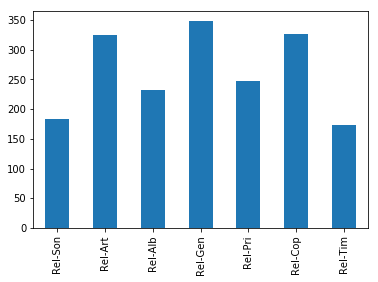

In [48]:
neg_variation_df = pd.DataFrame(data = ri_norms_negative_samples,columns = column_names)
sum_ri = neg_variation_df.sum()
plt = sum_ri.plot
plt.bar()

In [49]:
variation_df.to_csv('experiments-results/exp10/ri_testneg_released.csv',index=False)

In [30]:
ri_norms_neg_att = []
for ri_list in negatives_ri_matrix:
    ri_norms = []
    for ri,att_set in zip(ri_list,attributes_sets):
        n1 = compute_norm(ri,att_set[0])
        n2 = compute_norm(ri,att_set[1])
        ri_norms.append(n1)
        ri_norms.append(n2)
    ri_norms_neg_att.append(ri_norms)

NameError: name 'attributes_sets' is not defined

In [17]:
variation_df = pd.DataFrame(data= ri_norms_neg_att,columns=flat_att_sets)
ri_sums_negatives = variation_df.sum()

NameError: name 'ri_norms_neg_att' is not defined

In [102]:
variation_df.head()

,Artist_Name0,Genre0,Artist_Name1,Song_Name1,CopyRight2,Genre2,Artist_Name3,Album_Name3,Artist_Name4,CopyRight4,Genre5,Released5,Album_Name6,Genre6,Time7,Album_Name7
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.687442,1.430575,0.552344,1.138795,1.710487,1.703254,0.865233,1.326938,1.681457,1.431555,1.801424,1.708084,1.448483,0.800714,0.886574,0.616825
2,4.964851,4.485097,1.489537,2.295615,5.012259,4.304899,1.798295,2.409765,4.179017,4.346412,4.900689,5.064298,3.906814,2.404675,1.829746,1.462432
3,1.445535,1.194519,0.368142,0.871793,1.471903,1.467681,0.600059,1.048642,1.442163,1.195161,1.598261,1.466476,1.137639,0.537943,0.645767,0.436375
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## Positive sample analysis

In [50]:
attribute_lenght= len(attributes)

current_sample = 0
#each column of this matrix is related to a specific attribute
positives_ri_matrix = []
for batch in positive_classifier_inputs:
    for sample_index in range(len(batch)):
        print('Processing sample {}'.format(current_sample))
        current_sample_ris = current_sample_ris = list(map(lambda att_set: find_smallest_variation_to_change(hybrid_model.classifier,
                                                                                    classifier_length=1200,
                                                                                    attribute_length=150,
                                                                                    input_matrix=batch,
                                                                                    vector_index=sample_index,
                                                                                    attributes=[attributes.index(attr)
                                                                                               for attr in att_set]
                                                                                    ,class_to_reach=0),attribute_sets))
        positives_ri_matrix.append(current_sample_ris)
        current_sample+=1

Processing sample 0
Processing sample 1
Processing sample 2
Processing sample 3
Processing sample 4
Processing sample 5
Processing sample 6
Processing sample 7
Processing sample 8
Processing sample 9
Processing sample 10
Processing sample 11
Processing sample 12
Processing sample 13
Processing sample 14
Processing sample 15
Processing sample 16
Processing sample 17
Processing sample 18
Processing sample 19
Processing sample 20
Processing sample 21
Processing sample 22
Processing sample 23
Processing sample 24
Processing sample 25
Processing sample 26
Processing sample 27
Processing sample 28
Processing sample 29
Processing sample 30


In [51]:
ri_norms_positive_samples = []
for ri_list in positives_ri_matrix:
    ri_norms_positive_samples.append(list(map(lambda x:torch.norm(x).data[0],ri_list)))

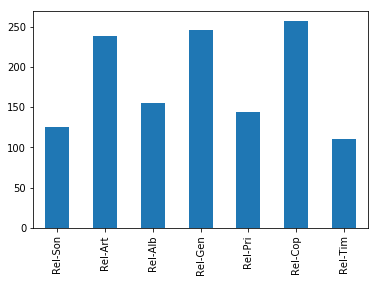

In [52]:
variation_pos_df = pd.DataFrame(data =ri_norms_positive_samples,columns = column_names)
ri_sum_pos = variation_pos_df.sum()
ri_sum_pos.plot.bar()

In [53]:
variation_pos_df.to_csv('experiments-results/exp10/ri_testpos_released.csv',index=False)

In [15]:
ri_norms_pos_att = []
for ri_list in positives_ri_matrix:
    ri_norms = []
    for ri,att_set in zip(ri_list,attributes_sets):
        n1 = compute_norm(ri,att_set[0])
        n2 = compute_norm(ri,att_set[1])
        ri_norms.append(n1)
        ri_norms.append(n2)
    ri_norms_pos_att.append(ri_norms)

In [16]:
variation_att_df = pd.DataFrame(data= ri_norms_pos_att,columns=flat_att_sets)
ri_sums_positives = variation_att_df.sum()
variation_att_df.head()

,Artist_Name0,Genre0,Artist_Name1,Song_Name1,CopyRight2,Genre2,Artist_Name3,Album_Name3,Artist_Name4,CopyRight4,Genre5,Released5,Album_Name6,Genre6,Time7,Album_Name7
0,4.804485,4.371204,1.823596,3.519529,4.793094,4.786947,2.531153,3.943701,4.754462,4.338392,4.407969,4.804278,4.180389,2.424607,2.496805,1.622202
1,6.363946,5.998527,2.388361,4.618821,6.350795,6.641876,3.403495,5.268424,6.515992,5.884302,6.165504,6.391537,5.601894,3.322313,2.539327,1.716307
2,9.618322,9.903447,3.085716,5.912929,9.587428,10.230182,4.605813,8.061900,10.407465,10.037332,10.231603,9.432396,8.266118,4.690207,3.959229,3.551533
3,6.387103,6.243425,2.225648,4.464905,6.407913,7.028916,3.259164,5.219594,6.843912,6.054524,6.505485,6.415355,5.537310,3.238541,3.175421,2.149989
4,5.000427,4.365960,1.352374,3.092900,4.766950,5.811758,2.061626,3.665950,5.715718,4.121321,6.127147,4.789872,3.912939,1.902776,2.299443,1.794180


In [17]:
variation_att_df.to_csv('experiments-results/exp10/ri_pos_couples.csv')

In [ ]:
variation_df = pd.DataFrame(data= ri_norms_positive_samples,columns=['c1','c2','c3','c4','c5','c6'])

In [ ]:
ri_sums = variation_df.sum(numeric_only=True)
ri_sums.plot.bar()